# Import required libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# Checking null values in the datasset

In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

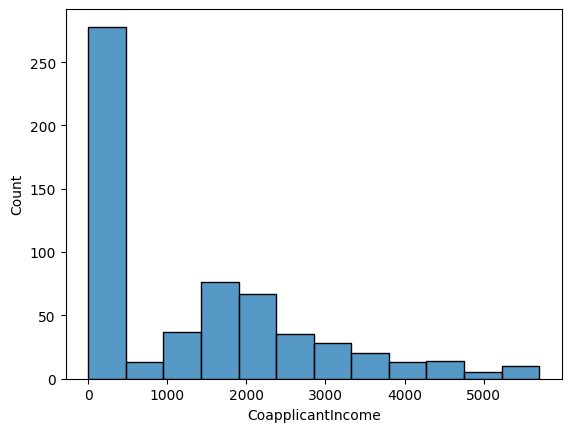

In [20]:
sns.histplot(dataset["CoapplicantIncome"])
plt.show()

# Checking the quartile range of the dataset

In [6]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q1, q3

(0.0, 2297.25)

In [7]:
IQR = q3 - q1
IQR

2297.25

# Finding the minimum and maximum range of the dataset

In [8]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range, max_range

(-3445.875, 5743.125)

In [9]:
dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

# Function transformation using Scikit Learn

In [10]:
from sklearn.preprocessing import FunctionTransformer

In [11]:
ft = FunctionTransformer(func = np.log1p)

In [12]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [13]:
dataset["CoapplicantIncome_transfn"] = ft.transform(dataset[["CoapplicantIncome"]])

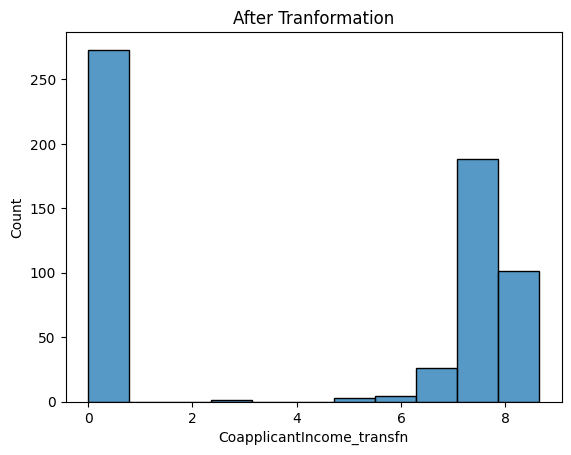

In [19]:
sns.histplot(dataset["CoapplicantIncome_transfn"])
plt.title("After Tranformation")

plt.show()